In [9]:

    # vortex oscillator continous model 
from scipy.constants import mu_0
import matplotlib.pyplot as plt
from scipy.constants import e

R_0 = 100 # sample resistance (ohms) ??? a  

R_load = 50 # measurment device resistance (ohms)
R_a_ap = 15 # diference of resistance between paralel and anti-paralel state (ohms)
beta = 0.6 # percentage of core displacement
Aplied_field = 0.2 # perpedicular aplied field (Tesla)
M_s_free = 0.8 # Saturation Magnetization of free Layer (Tesla)
M_s_SAF = 1.2 # Saturation Magnetization of pinned layer (Tesla)

hbar = 6.626e-34
zeta = 2 # zeta parameter (experimental)
Aplied_field = 0.44 # perpedicular aplied field (Tesla)
M_s_free = 6.5e5 # Saturation Magnetization of free Layer (A/m)
M_s_free_tesla = 0.81 # Saturation Magnetization of free Layer (Tesla)
gyro_ratio = 1.7e11 # gyromagnetic ratio (hz/T) ???????
gilbert_cte = 0.01 # gilbert cte
b = 33e-9 # vortex core radius
Chirality = -1
P_spin = 0.5
M_s_SAF = 10.1e5
M_s_SAF_tesla = 1.2

def Compute_I_th(L,R):

        def thetha_0(Aplied_field,M_s_free):   # angle (rad) (correct)
            thetha_0 = np.arccos((Aplied_field)/(4*np.pi*M_s_free))
            return thetha_0

        def k_ms(theta_0,L,R):      # vortex stiffens (kg/s^2) (correct)
            kappa_ms = (10 / 9) * mu_0 * (M_s_free ** 2) * ((L ** 2) / R) * (np.sin(theta_0) ** 2)
            return kappa_ms

        def k_ms_prime(k_ms): 
            k_ms_prime = 0.25 * k_ms
            return k_ms_prime

        def k_oe(L,R,theta_0):
            kappa_oe = 0.85 * Chirality * mu_0 * M_s_free * L * R * np.sin(theta_0)
            return kappa_oe

        def k_oe_prime(L,R,theta_0):
            kappa_oe_prime = -0.42 * Chirality * mu_0 * M_s_free * L * R * np.sin(theta_0)
            return kappa_oe_prime

        def G_parameter(L,M_s_free,theta_0):

            G = 2*np.pi*((L*M_s_free)/gyro_ratio)*(1-np.cos(theta_0))
            return G

        def D_parameter(L,R,theta_0):
            eta = (np.log(R / (2 * b)) - 1 / 4) * (np.sin(theta_0) ** 2)
            D = 2 * np.pi * gilbert_cte * eta * L * M_s_free / gyro_ratio
            return D

        def kappa_parameter(k_ms,k_oe,I,R):            # kappa parameter (kg/s^2)  (correct)
            kappa = k_ms + (k_oe*I)/(np.pi*(R)**2)
            return kappa


        def a_j(M_s_SAF,Aplied_field,theta_0):
            p_z = (795774*Aplied_field/(4*np.pi*M_s_SAF))
            a_j = np.pi * ((hbar*P_spin)/(2*e))*p_z * (np.sin(theta_0))**2
            return a_j

        theta_0 =  thetha_0(Aplied_field,M_s_free_tesla)
        #print('angle',theta_0,'rad')

        k_ms_value = k_ms(theta_0,L,R)
        #print('vortex stiffnes',k_ms_value,'kg / s^2')

        k_ms_prime_value = k_ms_prime(k_ms_value)
        #print('non linear vortex stiffnes factor',k_ms_prime_value,'kg/s^2')

        k_oe_value = k_oe(L,R,theta_0)
        #print('oersted stiffnes',k_oe_value,'kg m^2 / A s^2')

        k_oe_prime_value = k_oe_prime(L,R,theta_0)
        #print('non linear oersted stiffnes factor',k_oe_prime_value,'kg m^2 / A s^2')



        D = D_parameter(L,R,theta_0)
        #print('Damping =',D,'kg / rad s')

        G = G_parameter(L,M_s_free,theta_0)
        #print('Gyrovector Magnitude = ',G,'kg/ rad s')

        a_j_value = a_j(M_s_SAF,Aplied_field,theta_0)
        #print('a_j=',a_j_value,'kg m^2 / A s^2')


        def threshold_current(D,R,a_j,G,k_ms,k_oe):         
            I_th = (D*k_ms*np.pi*(R**2)/(a_j*G-D*k_oe))
            return I_th

        I_th = threshold_current(D,R,a_j_value,G,k_ms_value,k_oe_value)
        #print('thershold current ',I_th,'A')

        #print('Relaxation time',T_relax,'s')

        return I_th 

C:\Users\paula\AppData\Local\Temp\ipykernel_40924\3269620923.py:98: RuntimeWarning: invalid value encountered in scalar divide
  I_th = (D*k_ms*np.pi*(R**2)/(a_j*G-D*k_oe))


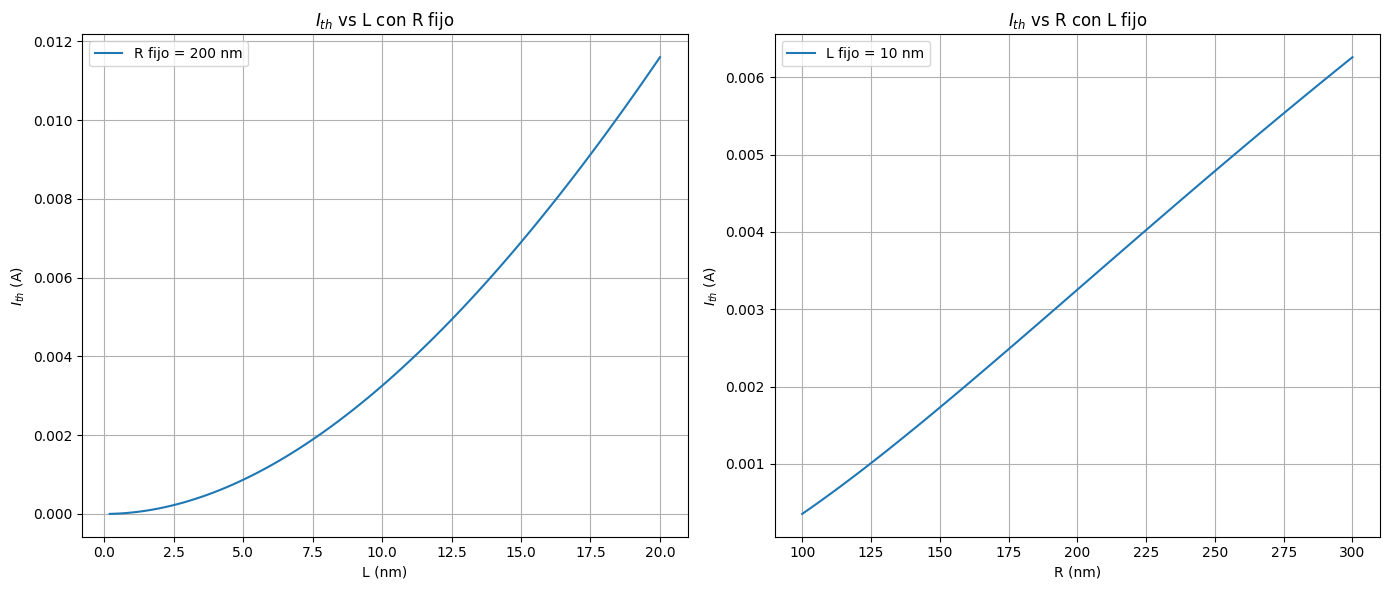

In [10]:
# Parámetros para los gráficos
L_fixed = 10e-9  # Longitud fija para el primer gráfico
R_fixed = 200e-9  # Radio fijo para el segundo gráfico

# Límite de valores para los gráficos
L_values = np.linspace(0e-9, 20e-9, 100)  # valores para L (en metros)
R_values = np.linspace(100e-9, 300e-9, 100)  # valores para R (en metros)


# Calcular I_th para los diferentes valores de R con L fijo
I_th_vs_R = [Compute_I_th(L_fixed, R) for R in R_values]

# Calcular I_th para los diferentes valores de L con R fijo
I_th_vs_L = [Compute_I_th(L, R_fixed) for L in L_values]

# Crear las gráficas
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico 1: I_th vs R (con L fijo)
axs[1].plot(R_values * 1e9, I_th_vs_R, label=f'L fijo = {L_fixed*1e9:.0f} nm')
axs[1].set_xlabel('R (nm)')
axs[1].set_ylabel('$I_{th}$ (A)')
axs[1].set_title('$I_{th}$ vs R con L fijo')
axs[1].legend()
axs[1].grid(True)

# Gráfico 2: I_th vs L (con R fijo)
axs[0].plot(L_values * 1e9, I_th_vs_L, label=f'R fijo = {R_fixed*1e9:.0f} nm')
axs[0].set_xlabel('L (nm)')
axs[0].set_ylabel('$I_{th}$ (A)')
axs[0].set_title('$I_{th}$ vs L con R fijo')
axs[0].legend()
axs[0].grid(True)

plt.tight_layout()
plt.show()

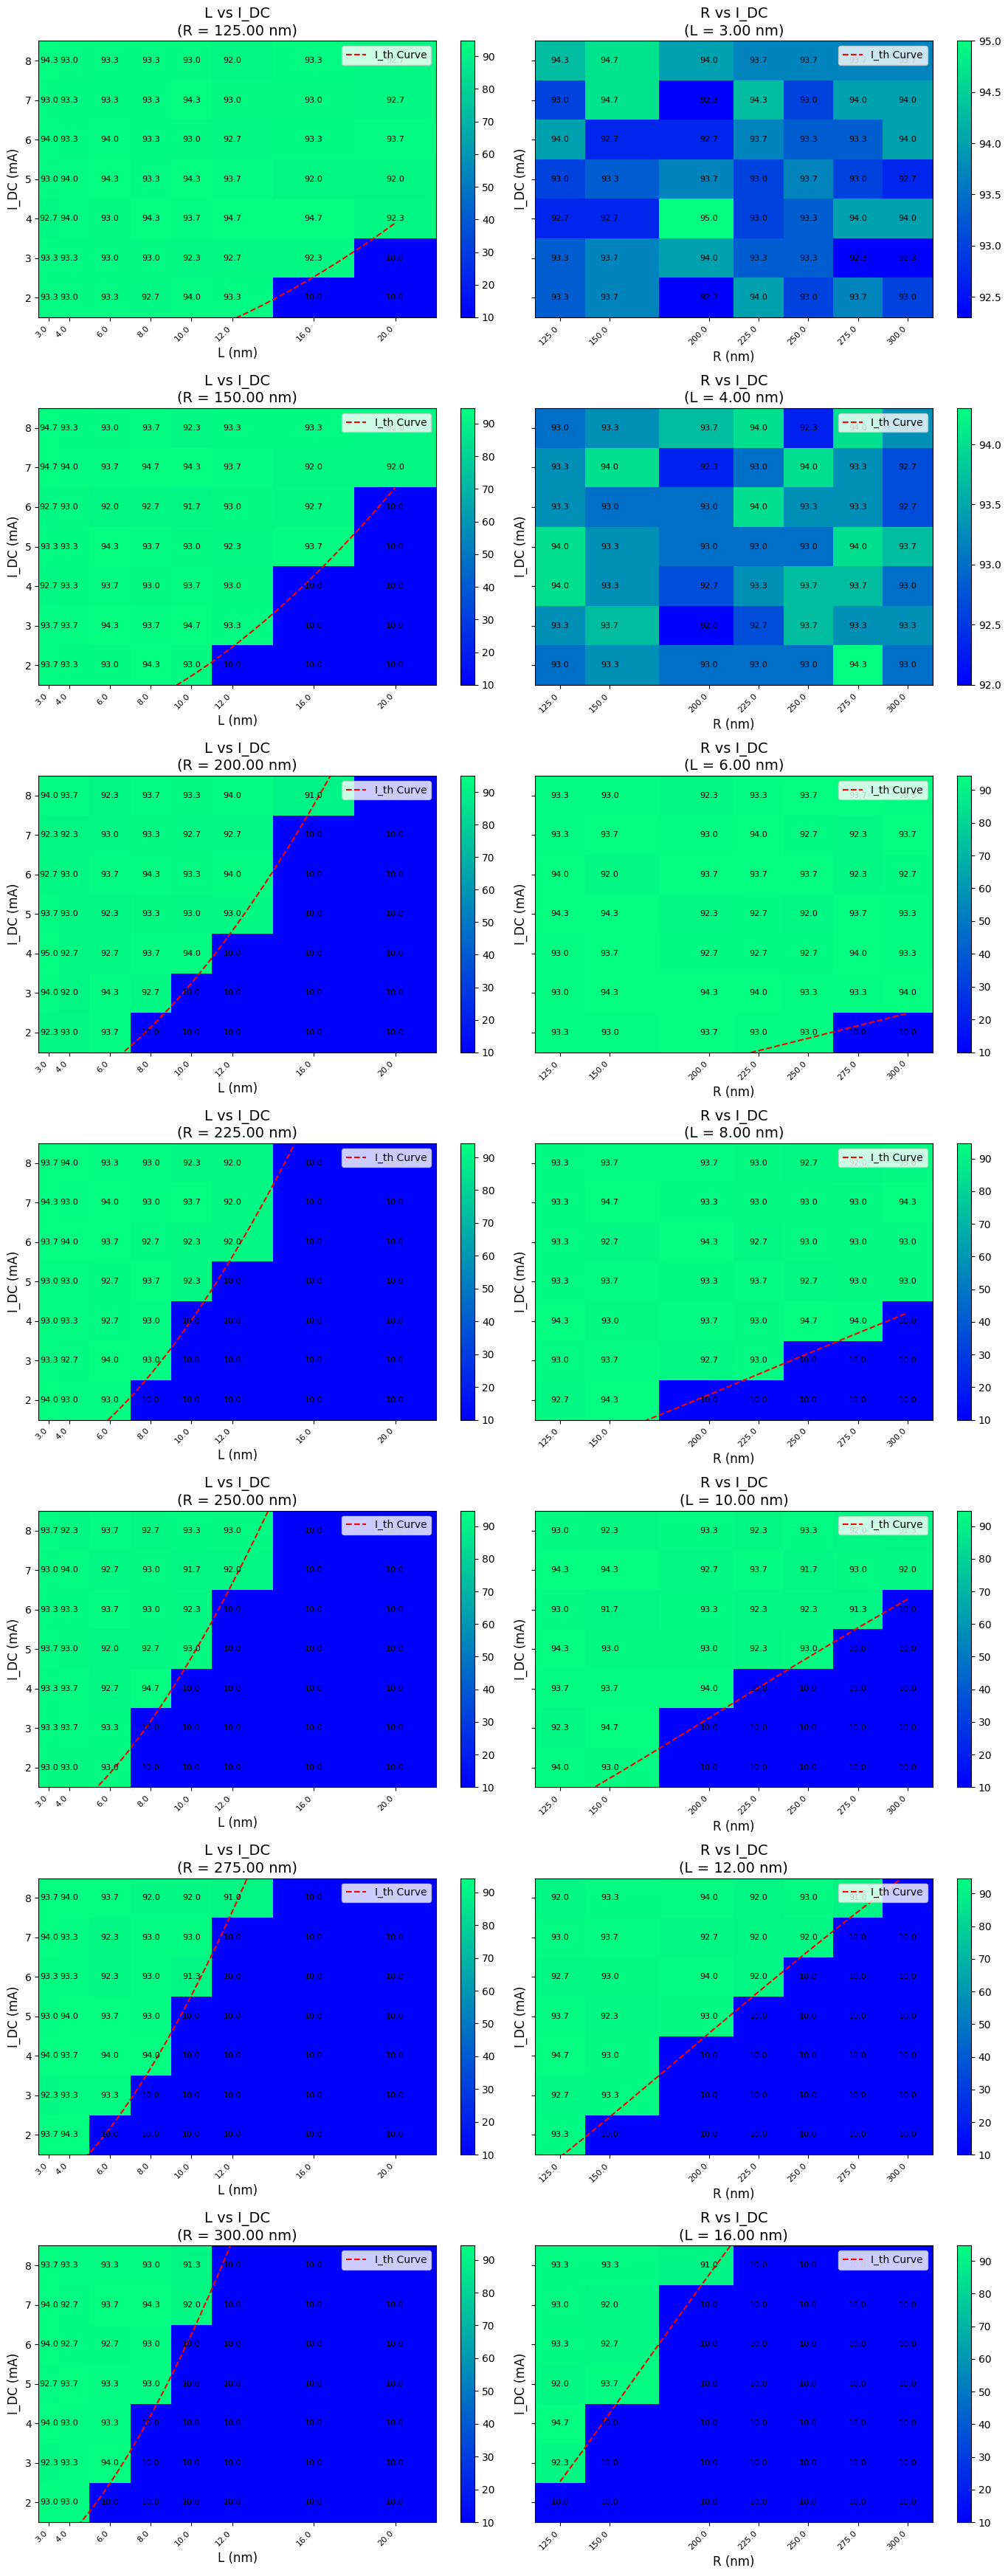

: 

In [14]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Función para crear un heatmap utilizando pcolormesh y superponer la curva
def create_pcolormesh_with_curve(df, x, y, value, curve_x, curve_y, ax, title, xlabel, ylabel):
    # Crear la matriz para el heatmap
    heatmap_data = df.pivot_table(index=y, columns=x, values=value, aggfunc='mean').values
    x_labels = sorted(df[x].unique())
    y_labels = sorted(df[y].unique())
    
    # Mostrar el heatmap usando pcolormesh con shading='nearest'
    X, Y = np.meshgrid(x_labels, y_labels)
    cax = ax.pcolormesh(X, Y, heatmap_data, cmap="winter", shading='nearest', vmin=df[value].min(), vmax=df[value].max())
    
    # Añadir anotaciones en el heatmap
    for j in range(heatmap_data.shape[0]):
        for i in range(heatmap_data.shape[1]):
            cell_value = heatmap_data[j, i]
            if not np.isnan(cell_value):
                ax.text(x_labels[i], y_labels[j], f"{cell_value:.1f}", ha='center', va='center', fontsize=8, color="black")
    
    # Configurar etiquetas de los ejes
    ax.set_title(title, fontsize=14)
    ax.set_xlabel(xlabel, fontsize=12)
    ax.set_ylabel(ylabel, fontsize=12)
    
    # Ajustar las etiquetas del eje x para que coincidan con los valores de x_labels
    ax.set_xticks(x_labels)
    ax.set_xticklabels([f"{label:.1f}" for label in x_labels], rotation=45, ha='right', fontsize=8)
    
    # Superponer la curva en el mismo gráfico
    ax.plot(curve_x, curve_y, color="red", linestyle="--", linewidth=1.5, label="I_th Curve")
    ax.legend(loc="upper right")
    
    # Añadir barra de color
    plt.colorbar(cax, ax=ax)

# Cargar el archivo CSV
df = pd.read_csv(r'C:\Users\paula\Desktop\RESULTS\VortexState\simulation_results_vortex_2.csv', delimiter=',') 

# Filtrar los datos donde rango_I_in == 4
df_filtered = df[df['rango_I_in'] == 4]

# Asegurarse de que Accuracy_Test está entre 0 y 1
df_filtered['Accuracy_Test'] = (df_filtered['Accuracy_Test'].clip(0, 1) * 100).round(1)

# Convertir L y R a nanómetros
df_filtered['L_nm'] = df_filtered['L'] * 1e9
df_filtered['R_nm'] = df_filtered['R'] * 1e9

# Convertir I_DC_Vortex a miliamperios
df_filtered['I_DC_Vortex_mA'] = (df_filtered['I_DC_Vortex'] * 1e3).astype(int)

# Filtrar para excluir valores donde I_DC_Vortex_mA >= 9
df_filtered = df_filtered[df_filtered['I_DC_Vortex_mA'] < 9]

# Valores únicos de R y L
unique_R = sorted(df_filtered['R'].unique())
unique_L = sorted(df_filtered['L'].unique())

# Crear una figura con subplots para todos los valores únicos de R y L
fig, axs = plt.subplots(len(unique_R), 2, figsize=(16, len(unique_R) * 5), sharey=True)
plt.subplots_adjust(hspace=0.5)

# Iterar sobre los valores únicos de R y L para crear los heatmaps y curvas
for i, (r_val, l_val) in enumerate(zip(unique_R, unique_L)):

    # Filtrar por el valor de R
    df_L_vs_I = df_filtered[df_filtered['R'] == r_val]
    # Filtrar por el valor de L
    df_R_vs_I = df_filtered[df_filtered['L'] == l_val]

    # Generar puntos para la curva I_th en función de L
    L_values = np.linspace(3e-9, 20e-9, 100) * 1e9  # Convertir a nm
    I_th_values_L = np.array([Compute_I_th(L, r_val) for L in L_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para L vs I_DC
    create_pcolormesh_with_curve(
        df=df_L_vs_I,
        x='L_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=L_values,
        curve_y=I_th_values_L,
        ax=axs[i, 0],
        title=f'L vs I_DC\n(R = {r_val * 1e9:.2f} nm)',
        xlabel='L (nm)',
        ylabel='I_DC (mA)'
    )
    
    # Generar puntos para la curva I_th en función de R
    R_values = np.linspace(125e-9, 300e-9, 100) * 1e9  # Convertir a nm
    I_th_values_R = np.array([Compute_I_th(l_val, R) for R in R_values / 1e9]) * 1e3  # Convertir a mA
    
    # Generar heatmap y superponer curva para R vs I_DC
    create_pcolormesh_with_curve(
        df=df_R_vs_I,
        x='R_nm',
        y='I_DC_Vortex_mA',
        value='Accuracy_Test',
        curve_x=R_values,
        curve_y=I_th_values_R,
        ax=axs[i, 1],
        title=f'R vs I_DC\n(L = {l_val * 1e9:.2f} nm)',
        xlabel='R (nm)',
        ylabel='I_DC (mA)'
    )

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.ylim(1.5,8.5)

plt.show()

In [17]:
# Cargar el archivo CSV
data = pd.read_csv(r'C:\Users\david\Desktop\RESULTS\VortexState\simulation_results_vortex.csv')
# Load the data


# Filter models where I_DC_Vortex is less than I_th
filtered_models = data[data['I_DC_Vortex'] < data['I_th']]

# Display each model and the total count
total_models = len(filtered_models)
filtered_models_output = filtered_models[['Model Number', 'I_DC_Vortex', 'I_th']]

print(total_models) 

print(list(filtered_models["Model Number"]))

134
[134, 141, 162, 169, 176, 177, 183, 184, 190, 191, 192, 211, 212, 218, 219, 220, 225, 226, 227, 232, 233, 234, 235, 239, 240, 241, 242, 243, 253, 260, 261, 262, 267, 268, 269, 270, 274, 275, 276, 277, 278, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 302, 303, 304, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 351, 352, 353, 354, 355, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392]


In [18]:
# Cargar el archivo CSV
data = pd.read_csv(r'C:\Users\david\Desktop\RESULTS\VortexState\simulation_results_vortex.csv')
# Load the data

# Filter models where I_DC_Vortex is less than I_th
filtered_models = data[data['I_DC_Vortex'] < data['I_th']]

# Get the total count and list of model numbers
total_models = len(filtered_models)
model_numbers = list(filtered_models["Model Number"])

# Count of models satisfying the condition for each value of L
count_by_L = filtered_models.groupby('L').size()

# Print statements
print(f"Total models where I_DC_Vortex < I_th: {total_models}")
print(f"Model Numbers: {model_numbers}")
print("\nCount of models where I_DC_Vortex < I_th for each L value:")
print(count_by_L)

Total models where I_DC_Vortex < I_th: 134
Model Numbers: [134, 141, 162, 169, 176, 177, 183, 184, 190, 191, 192, 211, 212, 218, 219, 220, 225, 226, 227, 232, 233, 234, 235, 239, 240, 241, 242, 243, 253, 260, 261, 262, 267, 268, 269, 270, 274, 275, 276, 277, 278, 281, 282, 283, 284, 285, 286, 288, 289, 290, 291, 292, 293, 294, 295, 302, 303, 304, 309, 310, 311, 312, 313, 314, 316, 317, 318, 319, 320, 321, 322, 323, 324, 325, 326, 327, 328, 329, 330, 331, 332, 333, 334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 344, 345, 351, 352, 353, 354, 355, 358, 359, 360, 361, 362, 363, 364, 365, 366, 367, 368, 369, 370, 371, 372, 373, 374, 375, 376, 377, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392]

Count of models where I_DC_Vortex < I_th for each L value:
L
6.000000e-09     2
8.000000e-09     9
1.000000e-08    17
1.200000e-08    26
1.600000e-08    38
2.000000e-08    42
dtype: int64
